In [4]:
'''
Questions
- do clusters need to be the same size?
- how in code are we clustering vs gdp?
'''

'\nQuestions\n'

In [5]:
'''
Drawing from: https://github.com/FrankRuns/Thinkful/blob/master/Unit4/KMeans/kmeans.py
and ultimately https://github.com/nborwankar/opendatasci/blob/master/notebooks/D3.%20K-Means%20Clustering%20Analysis.ipynb
and http://nbviewer.ipython.org/github/datadave/GADS9-NYC-Spring2014-Lectures/blob/master/lessons/lesson13_kmeans/GA13_KMeans_CountryData.ipynb

see how lifeMale, lifeFemale and infantMortality cluster according to GDPperCapita

To Do:
- Determine how many rows are in the dataset. Determine the number of non-null values present in each column.
-- 207 + column. See code below for non_null counts.
- Based on the number of non-null values, which columns do you think will be the best to try to cluster on?
-- lifemale/female, infant mortality, per capita gdp, tfr
- Determine the data type of each column.
-- Countries and regions are objects, everything else is float
- How many counries are present in the dataset?
-- 207
- Determine the ideal number of clusters (1 to 10)

TFR = total fertility rate
'''

'\nDrawing from: https://github.com/FrankRuns/Thinkful/blob/master/Unit4/KMeans/kmeans.py\nand ultimately https://github.com/nborwankar/opendatasci/blob/master/notebooks/D3.%20K-Means%20Clustering%20Analysis.ipynb\nand http://nbviewer.ipython.org/github/datadave/GADS9-NYC-Spring2014-Lectures/blob/master/lessons/lesson13_kmeans/GA13_KMeans_CountryData.ipynb\n\nsee how lifeMale, lifeFemale and infantMortality cluster according to GDPperCapita\n\nTo Do:\n- Determine how many rows are in the dataset. Determine the number of non-null values present in each column.\n-- 207 + column. See code below for non_null counts.\n- Based on the number of non-null values, which columns do you think will be the best to try to cluster on?\n-- lifemale/female, infant mortality, per capita gdp, tfr\n- Determine the data type of each column.\n-- Countries and regions are objects, everything else is float\n- How many counries are present in the dataset?\n-- 207\n- Determine the ideal number of clusters (1 to 

In [29]:
## Imports
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
## Read in data
df = pd.read_csv("/Users/fred/Dropbox/Thinkful/un_cluster_copy.csv")


# read in 4col data for DataDave ver
fName = ("/Users/fred/Dropbox/Thinkful//UN4col.csv")
fp = open(fName)
X = np.loadtxt(fp) # loading into array
fp.close


<function close>

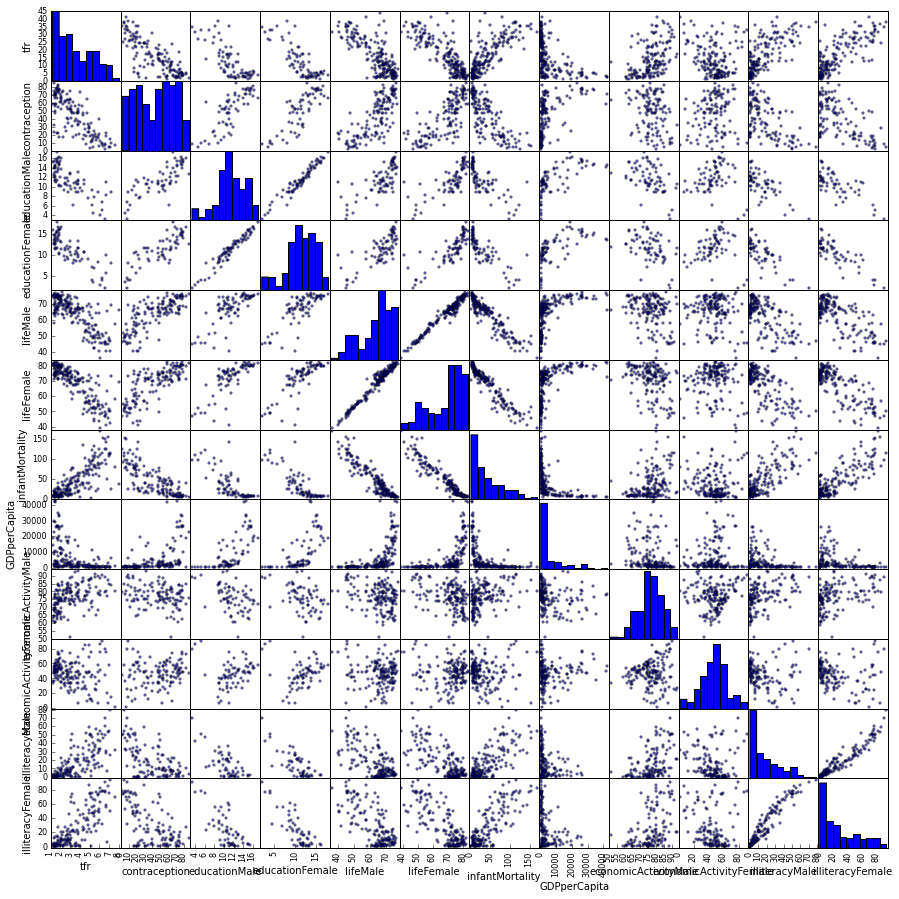

In [8]:
_=pd.scatter_matrix(df,figsize=(15,15))

In [9]:
df.notnull().sum()

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64

In [10]:
#df.dtypes

In [11]:
df.describe()

,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
count,197.000000,144.000000,76.000000,76.000000,196.00000,196.000000,201.000000,197.000000,165.000000,165.000000,160.000000,160.000000
mean,3.528782,43.430556,11.410526,11.275000,63.62551,68.391837,43.477612,6261.954315,76.460606,46.794545,17.554662,27.906200
std,1.761974,23.706732,3.049834,3.475135,9.78687,11.041234,38.756041,9355.659390,7.687047,16.810472,17.813000,26.580664
min,1.190000,2.000000,3.300000,2.000000,36.00000,39.100000,2.000000,36.000000,51.200000,1.900000,0.200000,0.200000
25%,1.950000,21.000000,9.750000,9.325000,57.37500,59.600000,12.000000,442.000000,72.300000,37.000000,2.952000,4.847000
50%,3.070000,47.000000,11.250000,11.650000,66.50000,72.150000,30.000000,1779.000000,76.800000,48.400000,10.829000,20.100000
75%,4.980000,64.000000,13.900000,13.650000,70.90000,76.425000,66.000000,7272.000000,81.200000,56.400000,27.575000,48.025000
max,8.000000,86.000000,17.200000,17.800000,77.40000,82.900000,169.000000,42416.000000,93.000000,90.600000,79.100000,93.400000


In [12]:
len(df.country)
df.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## Create dtaframe for cluster analysis
a = df[['lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita']]
#print len(df2)
## Drop NA from df
#df2 = df2.dropna() # when is this a good idea?
#print len(df2)

In [24]:
a.head()
'''
Male and female life expectancy in yrs
Infant mortality per 1000
'''
a.columns

SyntaxError: invalid syntax (<ipython-input-24-0a688725d2a9>, line 7)

In [ ]:
pd.scatter_matrix(a, figsize=(10,10))

In [21]:
## Cluster data in K=1...10 clusters
## Find centroid distance?

K = range(1,10)
print "K ", K

## Using scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K] # apply kmeans 1 to 10
# print "KM ", type(KM), KM # type is list
centroids = [cent for (cent,var) in KM] # cluster centroids
#print "Centroids", type(centroids),  centroids # type is list

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
#print "D_k", type(D_k), D_k # another list

cIdx = [np.argmin(D,axis=1) for D in D_k]  # WHAT IS THIS
dist = [np.min(D,axis=1) for D in D_k]  # getting the shortest cluster plath
avgWithinSS = [sum(d)/X.shape[0] for d in dist] # squaring the results for the cluster

#print "cIdx", cIdx
#print "dist", dist
#print "avgWithinSS", avgWithinSS

'''
We will be plotting Within Cluster of Sum-Squares vs # of clusters to figure 
out what the tightest cluster grouping is. To get WCSS we run the distance
of points from the center of each cluster and square it. This is done for each point
and square it. Then do for each cluster to find smaller distances.

More clusters will equal smaller numbers but we want to find when that 
efficiecney starts to level off.
'''

K  [1, 2, 3, 4, 5, 6, 7, 8, 9]


'\nWe will be plotting Within Cluster of Sum-Squares vs # of clusters to figure \nout what the tightest cluster grouping is. To get WCSS we run the distance\nof points from the center of each cluster and square it. This is done for each point\nand square it. Then do for each cluster to find smaller distances.\n\nMore clusters will equal smaller numbers but we want to find when that \nefficiecney starts to level off.\n'

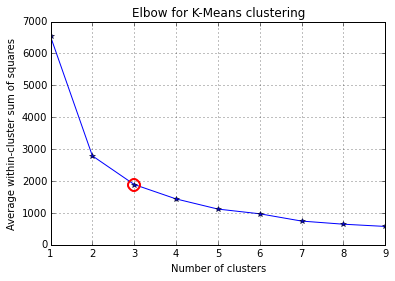

In [26]:
kIdx = 2 # not sure what this is or how 2 was decied
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-') # is the b* the marker, think yes
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
        markeredgewidth=2, markeredgecolor='r', markerfacecolor='None') # this draws teh circle and puts in the Y axis at least
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')

In [28]:
''' Now we know 3 is a good cluster (no 'best', I think) we can go ahead and fit the clusters '''

" Now we know 3 is a good cluster (no 'best', I think) we can go ahead and fit the clusters "

In [35]:
km = KMeans(3, init='k-means++') # initialize model
km.fit(X)
c = km.predict(X) # classify into 3 clusters
print c

[0 0 0 0 2 0 2 1 0 2 2 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 1 0 2 2 0 0 0 0 0 0 1 0 1
 0 0 0 2 2 2 2 0 0 1 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 2 0 0
 0 0 0 0 0 0 0 0 0 1 2 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 1 0 2 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 0 0 0 0 0 0
 0 0 0]


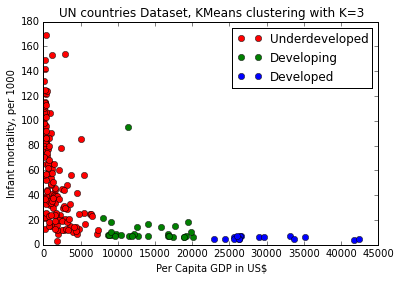

In [40]:
import kmeans as mykm 
# this is reading in different - original data science course guy's code
# for this which contains plot function with labels and so forth
(p10,p11,p12) = mykm.plot_clusters(X,c,3,2) # column 3 GDP, vs column 2 infant mortality. Note indexing is 0 based
#columns: lifeMale,lifeFemale,infantMortality and GDPperCapita



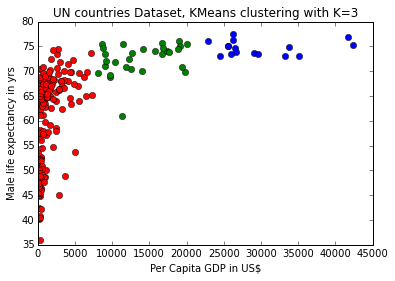

In [41]:
(pl0,pl1,pl2) = mykm.plot_clusters(X,c,3,0,False)

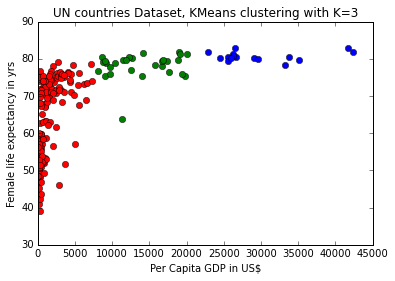

In [42]:
(pl0,pl1,pl2) = mykm.plot_clusters(X,c,3,1,False)